# Robotic Arm Simulator - Data Analysis
*Generated on 2025-06-01 18:08:45*

This notebook analyzes interaction and performance data from the robotic arm simulator.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
sns.set(style='whitegrid')

In [6]:
file_path = '/Users/alifathi/Desktop/Spring/robotic-arm-simulator/results_cleaned.csv'
df = pd.read_csv(file_path)
df.head()

,X,Y,Theta1,Theta2,Success,Timestamp,Source,Execution_Time,Distance_Error
0,12.0,2.0,-77.05,173.03,True,2025-06-01T11:20:20.058868,Form,0.03,0.0
1,12.0,2.0,-77.05,173.03,True,2025-06-01T11:20:28.062686,Form,0.03,0.0
2,50.0,6.0,-68.57,150.83,True,2025-06-01T11:20:37.882785,Form,0.01,0.0
3,12.0,100.0,23.39,119.52,True,2025-06-05T08:11:30.566783,Form,0.01,0.0
4,20.0,37.0,-16.25,155.72,True,2025-06-05T08:13:41.316521,Form,0.02,0.0


In [5]:
import pandas as pd

file_path = '/Users/alifathi/Desktop/Spring/robotic-arm-simulator/results_cleaned.csv'

rich_rows = []

with open(file_path, 'r') as f:
    lines = f.readlines()

for i, line in enumerate(lines[1:]):  # skip header
    parts = line.strip().split(',')
    if len(parts) == 9:
        try:
            ts, x, y, theta1, theta2, mode, errx, erry, success = parts
            rich_rows.append({
                'Timestamp': pd.to_datetime(ts),
                'X': float(x),
                'Y': float(y),
                'Theta1': float(theta1),
                'Theta2': float(theta2),
                'Mode': mode,
                'ErrorX': float(errx),
                'ErrorY': float(erry),
                'Success': success == 'True'
            })
        except ValueError as e:
            print(f"Skipping malformed row {i+2}: {e} → {parts}")

# Create DataFrame from fully detailed rows only
df_full = pd.DataFrame(rich_rows)

# Display preview
df_full.head()



Skipping malformed row 2: Given date string "12.0" not likely a datetime, at position 0 → ['12.0', '2.0', '-77.05', '173.03', 'True', '2025-06-01T11:20:20.058868', 'Form', '0.03', '0.0']
Skipping malformed row 3: Given date string "12.0" not likely a datetime, at position 0 → ['12.0', '2.0', '-77.05', '173.03', 'True', '2025-06-01T11:20:28.062686', 'Form', '0.03', '0.0']
Skipping malformed row 4: Given date string "50.0" not likely a datetime, at position 0 → ['50.0', '6.0', '-68.57', '150.83', 'True', '2025-06-01T11:20:37.882785', 'Form', '0.01', '0.0']
Skipping malformed row 5: Given date string "12.0" not likely a datetime, at position 0 → ['12.0', '100.0', '23.39', '119.52', 'True', '2025-06-05T08:11:30.566783', 'Form', '0.01', '0.0']
Skipping malformed row 6: Given date string "20.0" not likely a datetime, at position 0 → ['20.0', '37.0', '-16.25', '155.72', 'True', '2025-06-05T08:13:41.316521', 'Form', '0.02', '0.0']
Skipping malformed row 7: Given date string "2.0" not likely a 

""


In [7]:
# Convert Timestamp column if available
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Date'] = df['Timestamp'].dt.date

In [8]:
# Calculate DistanceError if not present
if 'DistanceError' not in df.columns and {'X', 'Y', 'Theta1', 'Theta2'}.issubset(df.columns):
    L1 = L2 = 100  # arm lengths
    theta1_rad = np.radians(df['Theta1'])
    theta2_rad = np.radians(df['Theta2'])
    x_pred = L1 * np.cos(theta1_rad) + L2 * np.cos(theta1_rad + theta2_rad)
    y_pred = L1 * np.sin(theta1_rad) + L2 * np.sin(theta1_rad + theta2_rad)
    df['DistanceError'] = np.sqrt((df['X'] - x_pred)**2 + (df['Y'] - y_pred)**2)
df.head()

,X,Y,Theta1,Theta2,Success,Timestamp,Source,Execution_Time,Distance_Error,Date,DistanceError
0,12.0,2.0,-77.05,173.03,True,2025-06-01 11:20:20.058868,Form,0.03,0.0,2025-06-01,0.008100
1,12.0,2.0,-77.05,173.03,True,2025-06-01 11:20:28.062686,Form,0.03,0.0,2025-06-01,0.008100
2,50.0,6.0,-68.57,150.83,True,2025-06-01 11:20:37.882785,Form,0.01,0.0,2025-06-01,0.004896
3,12.0,100.0,23.39,119.52,True,2025-06-05 08:11:30.566783,Form,0.01,0.0,2025-06-05,0.014609
4,20.0,37.0,-16.25,155.72,True,2025-06-05 08:13:41.316521,Form,0.02,0.0,2025-06-05,0.002338


## Execution Time Distribution
Understanding how fast the system responds to user input.

In [9]:
if 'ExecutionTime' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['ExecutionTime'], kde=True, color='skyblue')
    plt.title('Execution Time Distribution')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency')
    plt.show()

## Distance Error Visualization
Evaluating how closely the arm reaches the target point.

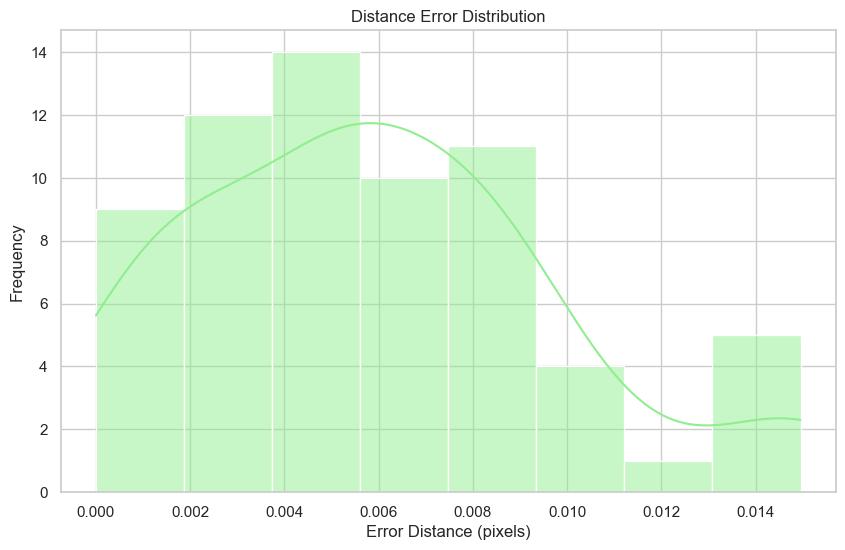

In [10]:
if 'DistanceError' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['DistanceError'], kde=True, color='lightgreen')
    plt.title('Distance Error Distribution')
    plt.xlabel('Error Distance (pixels)')
    plt.ylabel('Frequency')
    plt.show()

## Interaction Type Usage
Comparing number of requests from Form vs API.

In [11]:
if 'InteractionType' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='InteractionType', palette='pastel')
    plt.title('Form vs API Usage')
    plt.xlabel('Interaction Type')
    plt.ylabel('Count')
    plt.show()

## Execution Time Over Time
Analyzing how execution time varies day by day.

In [13]:
if 'Date' in df.columns and 'ExecutionTime' in df.columns:
    daily_avg = df.groupby('Date')['ExecutionTime'].mean()
    plt.figure(figsize=(10, 5))
    daily_avg.plot(marker='o')
    plt.title('Average Execution Time per Day')
    plt.xlabel('Date')
    plt.ylabel('Avg Execution Time (s)')
    plt.grid(True)
    plt.show()

In [3]:
import pandas as pd

# Load the original results.csv (adjust the path if needed)
df_raw = pd.read_csv("results.csv", header=None)

# Drop malformed rows (those with fewer or more than 9 values)
df_raw = df_raw[df_raw.apply(lambda row: len(row.dropna()) == 9, axis=1)]

# Rename columns for clarity
df_raw.columns = [
    "X", "Y", "Theta1", "Theta2", "Success",
    "Timestamp", "Source", "Execution_Time", "Distance_Error"
]

# Convert numeric fields to appropriate data types
df_raw["X"] = pd.to_numeric(df_raw["X"], errors="coerce")
df_raw["Y"] = pd.to_numeric(df_raw["Y"], errors="coerce")
df_raw["Theta1"] = pd.to_numeric(df_raw["Theta1"], errors="coerce")
df_raw["Theta2"] = pd.to_numeric(df_raw["Theta2"], errors="coerce")
df_raw["Execution_Time"] = pd.to_numeric(df_raw["Execution_Time"], errors="coerce")
df_raw["Distance_Error"] = pd.to_numeric(df_raw["Distance_Error"], errors="coerce")
df_raw["Success"] = df_raw["Success"].astype(str)

# Drop rows with missing data (optional)
df_cleaned = df_raw.dropna()

# Save clean data to a new file
df_cleaned.to_csv("results_cleaned.csv", index=False)

print("✅ Cleaned CSV saved as 'results_cleaned.csv'")


✅ Cleaned CSV saved as 'results_cleaned.csv'
